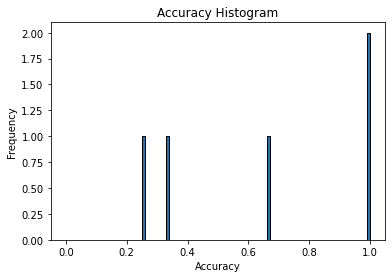

In [22]:
import os
import json
import matplotlib.pyplot as plt

def load_jsonl_files_recursively(dir_path):
    all_data = []
    
    for root, _, files in os.walk(dir_path):
        for file in files:
            if file.endswith(".jsonl"):
                file_path = os.path.join(root, file)
                with open(file_path, "r") as f:
                    file_data = [json.loads(line) for line in f]
                    all_data.extend(file_data)
    
    return all_data

def extract_accuracies(data):
    accuracies = []
    for record in data:
        if 'final_report' in record:
            accuracy = record['final_report']['accuracy']
            accuracies.append(accuracy)
    return accuracies

# Load the data recursively
dir_path = "evals"
data = load_jsonl_files_recursively(dir_path)

# Extract accuracies from the data
accuracies = extract_accuracies(data)

# Plot the accuracies in a histogram chart
plt.hist(accuracies, bins=100, range=(0, 1), edgecolor='black')
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.title("Accuracy Histogram")
plt.show()


In [26]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def print_graph():
    directory = 'evals/'
    files = os.listdir(directory)
    
    eval_name_counter = {}
    
    for file in files:
        if file.endswith(".jsonl"):
            with open(os.path.join(directory, file), 'r') as f:
                jsonl_content = f.read()
                
            # Read the JSONL content into a DataFrame
            data = [json.loads(line) for line in jsonl_content.split('\n') if line]
            df = pd.DataFrame(data)

            if 'spec' not in df.columns:
                continue

            # Extract the "eval_name" from the "spec" dictionaries
            df['eval_name'] = df['spec'].apply(lambda x: x['eval_name'] if isinstance(x, dict) else None)

            for eval_name in df['eval_name']:
                if eval_name not in eval_name_counter:
                    eval_name_counter[eval_name] = 0
                eval_name_counter[eval_name] += 1

    # Print the counts
    print("Counts for each eval_name:")
    for eval_name, count in eval_name_counter.items():
        print(f"{eval_name}: {count}")

print_graph()


Counts for each eval_name:
test-match.s1.simple-v0: 22
None: 45
test-fuzzy-match.s1.simple-v0: 2


In [27]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def print_graph():
    directory = 'evals/'
    files = os.listdir(directory)
    
    eval_name_counter = {}
    
    for file in files:
        if file.endswith(".jsonl"):
            with open(os.path.join(directory, file), 'r') as f:
                jsonl_content = f.read()
                
            # Read the JSONL content into a DataFrame
            data = [json.loads(line) for line in jsonl_content.split('\n') if line]
            df = pd.DataFrame(data)

            if 'spec' not in df.columns:
                continue

            # Filter the DataFrame to only include rows with the "spec" key
            spec_df = df[df['spec'].notna()].copy()

            # Extract the "eval_name" from the "spec" dictionaries
            spec_df.loc[:, 'eval_name'] = spec_df['spec'].apply(lambda x: x['eval_name'])

            for eval_name in spec_df['eval_name']:
                if eval_name not in eval_name_counter:
                    eval_name_counter[eval_name] = 0
                eval_name_counter[eval_name] += 1

    # Print the counts
    print("Counts for each eval_name:")
    for eval_name, count in eval_name_counter.items():
        print(f"{eval_name}: {count}")

print_graph()


Counts for each eval_name:
test-match.s1.simple-v0: 22
test-fuzzy-match.s1.simple-v0: 2
